In [2]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colorbar as cb
from __future__ import division
from operator import truediv
import copy

In [3]:
#This code uses an euler-cromer method to calculate the position and angular velocity over time of
#a pendulum

def pendulum(theta0, wvelocity0, length, q, Omega, Drag, dt, T):
    g = 9.8      #gravitational constant (m/s^2) 
    
    #We initialize our arrays
    
    t=np.arange(0,T,dt)
    theta = np.arange(0,T,dt)
    wvelocity = np.arange(0,T,dt)
    
    #set intial values
    
    theta[0] = theta0
    wvelocity[0] = wvelocity0
    
    #calculate the number of steps needed
    steps = int(T/dt)
    
    #This while loop uses a standard euler-cromer stepping method to conserve energy in the pendulum
    i=1
    while i < steps:
        wvelocity[i] = wvelocity[i-1] + ((-g/length)*np.sin(theta[i-1])- q*wvelocity[i-1] + Drag * np.sin(Omega*t[i-1]))*dt
        theta[i] = theta[i-1] + wvelocity[i] * dt
        if theta[i] < - np.pi:
            theta[i] = theta[i] + 2* np.pi
        if theta[i] > np.pi:
            theta[i] = theta[i] - 2 * np.pi
        t[i] = t[i-1]+dt
        i=i+1
    return t, theta, wvelocity

In [4]:
t, th, w = pendulum(.1, 0, 9.8, 0, 0, 0, .04, 60)

In [5]:
t1, th1, w2 =pendulum(1, 0, 9.8, .5, 2/3, 1.2, .01, 60)

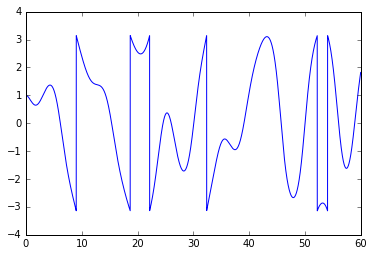

In [6]:
plt.plot(t1,th1)
#plt.plot(th1,w2, 'o', markersize =1 )
plt.show()

In [7]:
print(th)

[ 0.1         0.09984027  0.09952105 ..., -0.09847066 -0.09769127
 -0.09675582]


In [4]:
#Now we use an Runge-Kutta2 method to calculate the motion of a pendulum over time

def RK2pendulum(theta0, wvelocity0, length, q, Omega, Drive, dt, T):
    g = 9.8      #gravitational constant (m/s^2) 
       
    #We initialize values and arrays    
        
    t=np.arange(0,T,dt)
    theta = np.arange(0,T,dt)
    wvelocity = np.arange(0,T,dt)
    
    theta[0] = theta0
    wvelocity[0] = wvelocity0
    
    steps = int(T/dt)
    
    i=1
    while i < steps: 
        t_ = t[i-1] + 1/2*dt
        theta_ = theta[i-1] + 1/2 * wvelocity[i-1]*dt
        wvel_ = wvelocity[i-1]  + (1/2)*((-g/length)*np.sin(theta[i-1])- q*wvelocity[i-1] + Drive * np.sin(Omega*t[i-1]))*dt
        
        theta[i] = theta[i-1] + wvel_ * dt
        wvelocity[i] = wvelocity[i-1] + ((-g/length)*np.sin(theta_)- q*wvel_ + Drive * np.sin(Omega*t_))* dt
        
        if theta[i] < - np.pi:
            theta[i] = theta[i] + 2* np.pi
        if theta[i] > np.pi:
            theta[i] = theta[i] - 2 * np.pi
        t[i] = t[i-1]+dt
        i=i+1
    return t, theta, wvelocity

In [9]:
t, th, w = RK2pendulum(1, 0, 9.8, .5, 2/3,1.2, .01, 100)

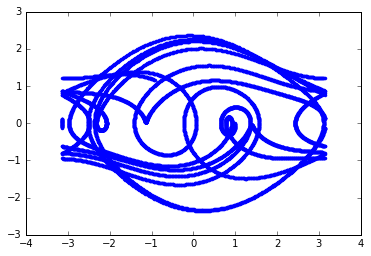

In [10]:
plt.plot(th,w,'.' )
plt.show()

In [88]:
ta, tha, wa =RK2pendulum(.2, 0, 9.8, .5, 2/3, 1.2, .04,60)

theta vs t


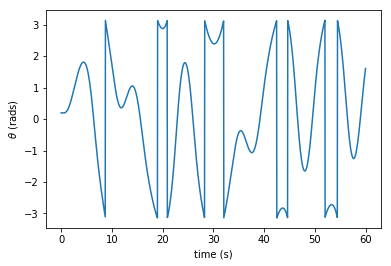

In [89]:
print('theta vs t')
plt.plot(ta,tha)
plt.ylabel(r'$\theta$ (rads)')
plt.xlabel(r'time (s)')
plt.savefig('tvtf12.png', bbox_inches='tight', dpi = 1000)



omega vs t
Fd = 1.2


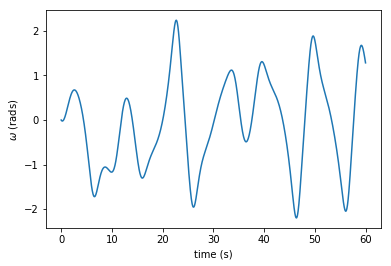

In [90]:
print('omega vs t')
plt.plot(ta,wa)
plt.ylabel(r'$\omega$ (rads)')
plt.xlabel(r'time (s)')
plt.savefig('wvtf12.png', bbox_inches='tight', dpi = 1000)

print('Fd = 1.2')

In [82]:
tb, thb, wb =RK2pendulum(.2, 0, 9.8, .5, 2/3, .5, .04,60)

theta vs t


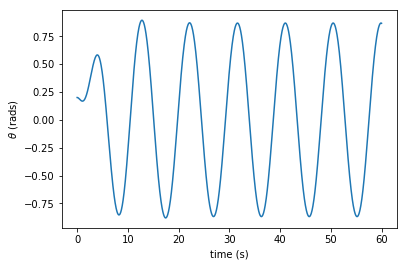

In [83]:
print('theta vs t')
plt.plot(tb, thb)
plt.ylabel(r'$\theta$ (rads)')
plt.xlabel(r'time (s)')
plt.savefig('tvtf5.png', bbox_inches='tight', dpi = 1000)


omega vs t
Fd = 0.5


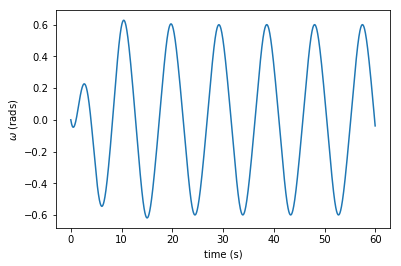

In [85]:
print('omega vs t')
plt.plot(tb,wb)
plt.ylabel(r'$\omega$ (rads)')
plt.xlabel(r'time (s)')
plt.savefig('wvtf5.png', bbox_inches='tight', dpi = 1000)
print('Fd = 0.5')

In [78]:
tc, thc, wc =RK2pendulum(.2, 0, 9.8, .5, 2/3, 0, .04,60)

theta vs t


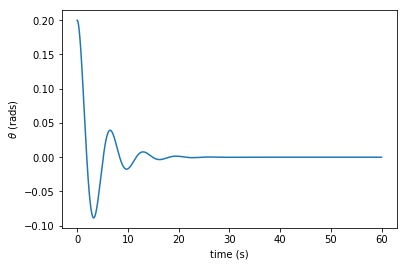

In [80]:
print('theta vs t')
plt.plot(tc,thc)
plt.ylabel(r'$\theta$ (rads)')
plt.xlabel(r'time (s)')
plt.savefig('tvtf0.png', bbox_inches='tight', dpi = 1000)


omega vs t
Fd = 0


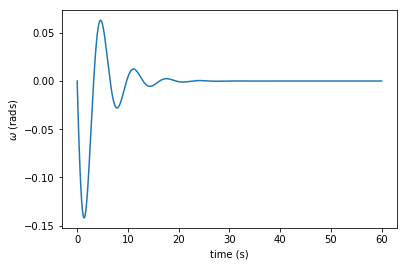

In [86]:
print('omega vs t')
plt.plot(tc,wc)
plt.ylabel(r'$\omega$ (rads)')
plt.xlabel(r'time (s)')
plt.savefig('wvtf0.png', bbox_inches='tight', dpi = 1000)
print('Fd = 0')

In [74]:
tp1, thp1, wp1 =RK2pendulum(.2, 0, 9.8, .5, 2/3, .5, .04,60)

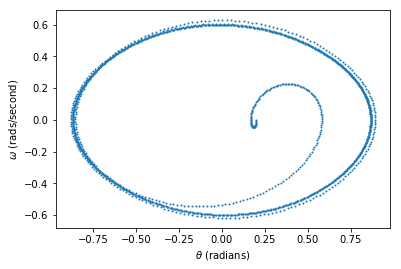

In [76]:
plt.plot(thp1,wp1,'.', markersize='2')
plt.ylabel(r'$\omega$ (rads/second)')
plt.xlabel(r'$\theta$ (radians)')
plt.savefig('38a.png', bbox_inches='tight', dpi = 1000)

In [71]:
tp2, thp2, wp2 =RK2pendulum(.2, 0, 9.8, .5, 2/3, 1.5, .04, 150)

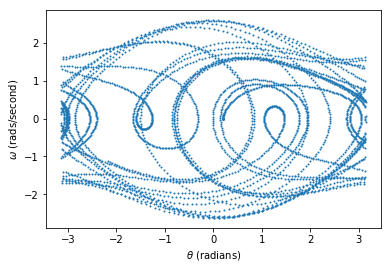

In [72]:
plt.plot(thp2,wp2, '.', markersize=2)
plt.ylabel(r'$\omega$ (rads/second)')
plt.xlabel(r'$\theta$ (radians)')
plt.savefig('38b.png', bbox_inches='tight', dpi = 1000)

In [14]:
#This function uses the RK2 function above to calculate the long term behavior of the a pendulum,
#this method is better at energy conservation and more precise with larger time steps

def Poincaresect(theta0, wvelocity0, length, q, Omega, Drive, N, cycles):
    dt =2*np.pi/(Omega*N)   #In order to preserve integer number of time steps in the while loop later, we need to set the time step
    t, th, w = RK2pendulum(theta0, wvelocity0, length, q, Omega, Drive, dt, cycles*2*np.pi/(Omega))
    wp = np.zeros(cycles)
    thp = np.zeros(cycles)
    steps =  int(2*np.pi/(Omega*dt))
    i=0
    while i < cycles:
        wp[i] = w[steps*i]
        thp[i] = th[steps*i]
        i=i+1

    
    return wp, thp

In [15]:
wp, thp =Poincaresect(.2, 0, 9.8, .5, 2/3, 1.2, 600, 1200)

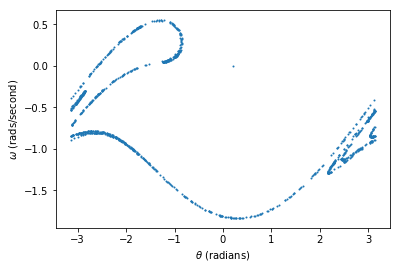

In [69]:
plt.plot(thp,wp,'.', markersize=2)
plt.ylabel(r'$\omega$ (rads/second)')
plt.xlabel(r'$\theta$ (radians)')
plt.savefig('PS.png', bbox_inches='tight', dpi = 1000)

In [17]:


def PSwithouttrans(theta0, wvelocity0, length, q, Omega, Drive, N, cycles, skip):
    dt =2*np.pi/(Omega*N)   #In order to preserve integer number of time steps in the while loop later, we need to set the time step
    t, th, w = RK2pendulum(theta0, wvelocity0, length, q, Omega, Drive, dt, cycles*2*np.pi/(Omega))
    wp = np.zeros(cycles-skip)
    thp = np.zeros(cycles-skip)
    steps =  int(2*np.pi/(Omega*dt))
    i=0
    while i < cycles-skip:
        wp[i] = w[steps*i+int(skip*steps)]
        thp[i] = th[steps*i+int(skip*steps)]
        i=i+1

    
    return wp, thp

In [18]:
ww, thth = PSwithouttrans(.2, 0, 9.8, .5, 2/3, 1.2, 600, 1200, 500)

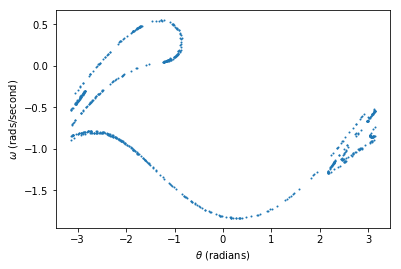

In [68]:
plt.plot(thth, ww, '.', markersize=2)
plt.ylabel(r'$\omega$ (rads/second)')
plt.xlabel(r'$\theta$ (radians)')
plt.savefig('PSwithouttrans.png', bbox_inches='tight', dpi = 1000)

In [38]:
def bifur(theta0, wvelocity0, length, q, Omega, Drivei, Drivef, N, cycles, skip):
    w = np.zeros(cycles-skip)
    thp = np.zeros(cycles-skip)
    bith = [np.zeros(cycles-skip) for i in np.arange(Drivei, Drivef, .001)]
    i=0
    for Drive in np.arange(Drivei, Drivef, .001):
        w, thp = PSwithouttrans(theta0, wvelocity0, length, q, Omega, Drive, N, cycles, skip)
        bith[i] = thp
        i = i+1
    return bith

In [62]:
thbi =0

In [13]:
thbi = bifur(.2, 0, 9.8, .5, 2/3, 1.35, 1.5, 300, 800, 600)

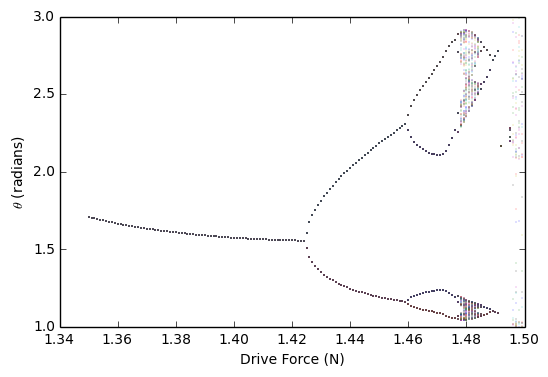

In [49]:
plt.plot(np.arange(1.35,1.5,.001), thbi, '.', markersize=.3)
axes = plt.gca()

axes.set_ylim([1,3])
plt.ylabel(r'$\theta$ (radians)')
plt.xlabel(r'Drive Force (N)')
#plt.savefig('fig311.png', bbox_inches='tight', dpi = 1000)


In [39]:
thbi1 = bifur(.2, 0, 9.8, .5, 2/3, .9, 1.75, 300, 1000, 600)

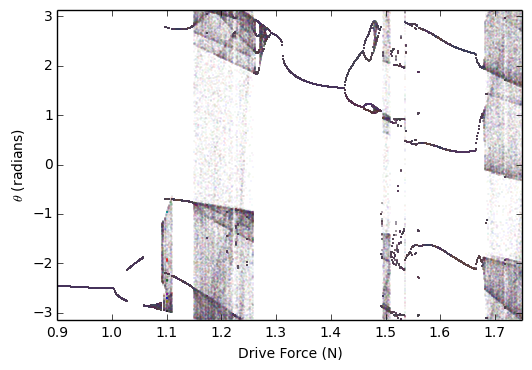

In [47]:
plt.plot(np.arange(.9,1.75,.001), thbi1, '.', markersize=.1)
axes = plt.gca()
axes.set_xlim([.9,1.75])
axes.set_ylim([-np.pi,np.pi])

plt.ylabel(r'$\theta$ (radians)')
plt.xlabel(r'Drive Force (N)')
#plt.savefig('largeforcesweep.png', bbox_inches='tight', dpi = 1000)


In [34]:
wwa, ththa = PSwithouttrans(.2, 0, 9.8, .5, 2/3, 1.4, 600, 1200, 700)

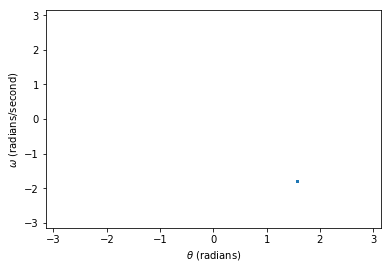

In [26]:
plt.plot(ththa, wwa, '.', markersize=2)

axes = plt.gca()
axes.set_xlim([-np.pi,np.pi])
axes.set_ylim([-np.pi,np.pi])

plt.ylabel(r'$\omega$ (radians/second)')
plt.xlabel(r'$\theta$ (radians)')
plt.show()

In [35]:
wwb, ththb = PSwithouttrans(.2, 0, 9.8, .5, 2/3, 1.44, 600, 1200, 700)

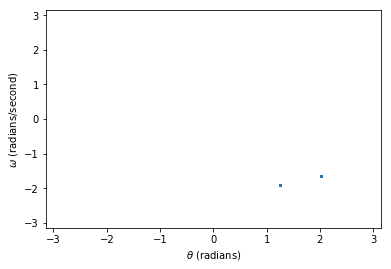

In [30]:
plt.plot(ththb, wwb, '.', markersize=2)

axes = plt.gca()
axes.set_xlim([-np.pi,np.pi])
axes.set_ylim([-np.pi,np.pi])

plt.ylabel(r'$\omega$ (radians/second)')
plt.xlabel(r'$\theta$ (radians)')
plt.show()

In [36]:
wwc, ththc = PSwithouttrans(.2, 0, 9.8, .5, 2/3, 1.465, 600, 1200, 700)

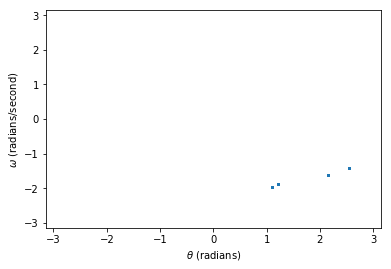

In [33]:
plt.plot(ththc, wwc, '.', markersize=2)

axes = plt.gca()
axes.set_xlim([-np.pi,np.pi])
axes.set_ylim([-np.pi,np.pi])

plt.ylabel(r'$\omega$ (radians/second)')
plt.xlabel(r'$\theta$ (radians)')
plt.show()

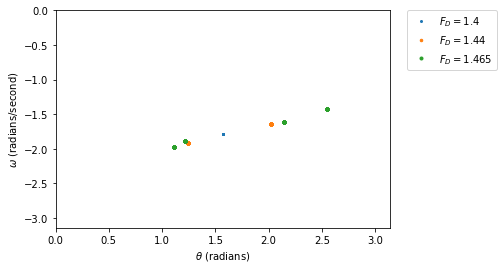

In [64]:
plt.plot(ththa, wwa, '.', markersize=4, label = r'$F_D = 1.4$')
plt.plot(ththb, wwb, '.', markersize=5, label = r'$F_D = 1.44$')
plt.plot(ththc, wwc, '.', markersize=6, label = r'$F_D = 1.465$')

axes = plt.gca()
axes.set_xlim([0,np.pi])
axes.set_ylim([-np.pi,0])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel(r'$\omega$ (radians/second)')
plt.xlabel(r'$\theta$ (radians)')
plt.savefig('318.png', bbox_inches='tight', dpi = 1000)

In [59]:
wwchaos, ththchaos = PSwithouttrans(np.pi/2, 0, 9.8, .5, 2/3, 1.2, 600, 2000, 1000)

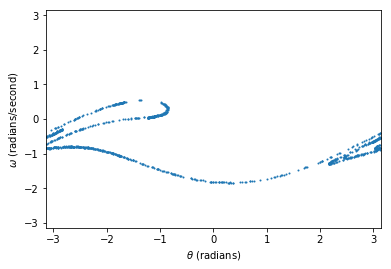

In [60]:
plt.plot(ththchaos, wwchaos, '.', markersize=2)

axes = plt.gca()
axes.set_xlim([-np.pi,np.pi])
axes.set_ylim([-np.pi,np.pi])

plt.ylabel(r'$\omega$ (radians/second)')
plt.xlabel(r'$\theta$ (radians)')
plt.show()